In [1]:
# import standard numerical modules
import numpy as np
import math
import tensorflow as tf
import gc

import DCTR


2024-05-03 13:09:30.818614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-05-03 13:09:30.818663: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data_dir = '../Data/'


In [3]:
# Load pre-normed Datasets: MiNNLO: X1 | POWHEG hvq: X0
# only contain tt-pair; every event has order: 
# tt-pair, top, anti-top
# every particle has arguments: 
# [pt, y, phi, mass, eta, E, PID, w, theta]
# [0 , 1, 2  , 3   , 4  , 5, 6  , 7, 8    ]

# POWHEG hvq
# plotting data; different from training data
X0_plt = []
X0_plt = DCTR.load_dataset(f'{data_dir}/POWHEG_hvq/13TeV/03-04_converted_lhe.npz', i=3)[:9553938] # 9553938 num of MiNNLO samples
print('POWHEG hvq all particles X0_plt.shape: '+str(X0_plt.shape))

X0_test = []
X0_test = DCTR.load_dataset(f'{data_dir}/POWHEG_hvq/13TeV/03-04_normed_converted_lhe.npz', i=3)[:9553938]
print('POWHEG hvq all particles X0_test.shape: '+str(X0_test.shape))


POWHEG hvq all particles X0_plt.shape: (9553938, 3, 9)
POWHEG hvq all particles X0_test.shape: (9553938, 3, 9)


In [4]:
# MiNNLO
# plotting data
X1_plt = []
X1_plt = DCTR.load_dataset(f'{data_dir}/MiNNLO/converted_with_13TeV_NLO/converted_lhe.npz', i=3)
print('MiNNLO all particles X1_plt.shape: '+str(X1_plt.shape))


MiNNLO all particles X1_plt.shape: (9553938, 3, 9)


In [5]:
# get event generator weights

X0_plt_wgt = X0_plt[:, 0, 7].copy()
X1_plt_wgt = X1_plt[:, 0, 7].copy()


In [6]:
# delete energy from (normalized) testing dataset, since the neural network was trained without these parameters
X0_test = np.delete(X0_test, 5, -1)

# delete eta
X0_test = np.delete(X0_test, 4, -1)

# garbage collection after deleting to clear memory asap
print(gc.collect())


194


In [7]:
model = './mean_training_best_model.tf' # path to previously trained model (in .tf format (folder))

''' # save weights to .h5 file
dctr = tf.keras.models.load_model(model)
dctr.save('best_model_weights.h5')
'''

# calculate rwgt
with tf.device('CPU'):
    dctr_rwgt = DCTR.get_rwgt([model], X0_test) # .tf models also include network architecture. get_rwgt() sets up the network for the (list of) models, then calls predict_weights() like in DCTR_notebook_OLD_14-to-13TeV notebook
# plot and check dctr rwgt
wgts = [(dctr_rwgt[0], r'DCTR NLO $\to$ NNLO reweights')]
DCTR.plot_weights(wgts, start = 0.0001, stop = 1000000)

# apply orginal generator weights to rwgt
rwgt = np.multiply(dctr_rwgt[0], X0_plt_wgt)


2024-05-03 13:17:51.497000: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-05-03 13:17:51.499465: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-05-03 13:17:51.501630: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (finn-ThinkPad-T540p): /proc/driver/nvidia/version does not exist
2024-05-03 13:17:51.549149: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 13:17:54.197644: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5732362

In [9]:
# check weights
print(f'X0_plt_wgt (min, max, mean): {min(X0_plt_wgt), max(X0_plt_wgt), np.mean(X0_plt_wgt)}')
print(f'X1_plt_wgt (min, max, mean): {min(X1_plt_wgt), max(X1_plt_wgt), np.mean(X1_plt_wgt)}')
print(f'X0rwgt    (min, max, mean): {min(rwgt), max(rwgt), np.mean(rwgt)}')


X0_plt_wgt (min, max, mean): (-692.465, 692.465, 686.4671955083866)
X1_plt_wgt (min, max, mean): (-103.245, 103.245, 83.13098417846136)
X0 rwgt (min, max, mean): (-5002.869879303932, 827275.0301689453, 527.9226660949363)


In [10]:
# setup args for plotting
args = [(X1_plt, X1_plt_wgt, 'NNLO (MiNNLO)'),
        (X0_plt, X0_plt_wgt, 'NLO (hvq)'),
        (X0_plt, rwgt, 'dctr reweighted')]


# Paper Plots

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


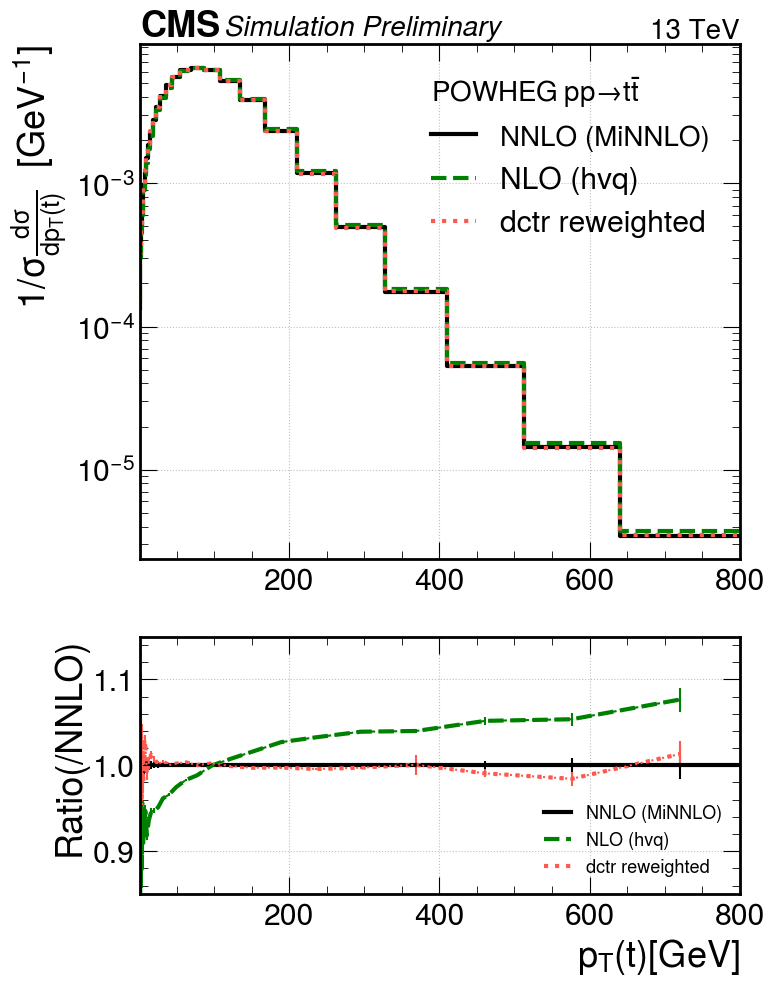

In [11]:
# p_t(t) log binning
log_bins = np.logspace(np.log10(1), np.log10(800), 31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.85, 1.15], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'mean_log_0800_31')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


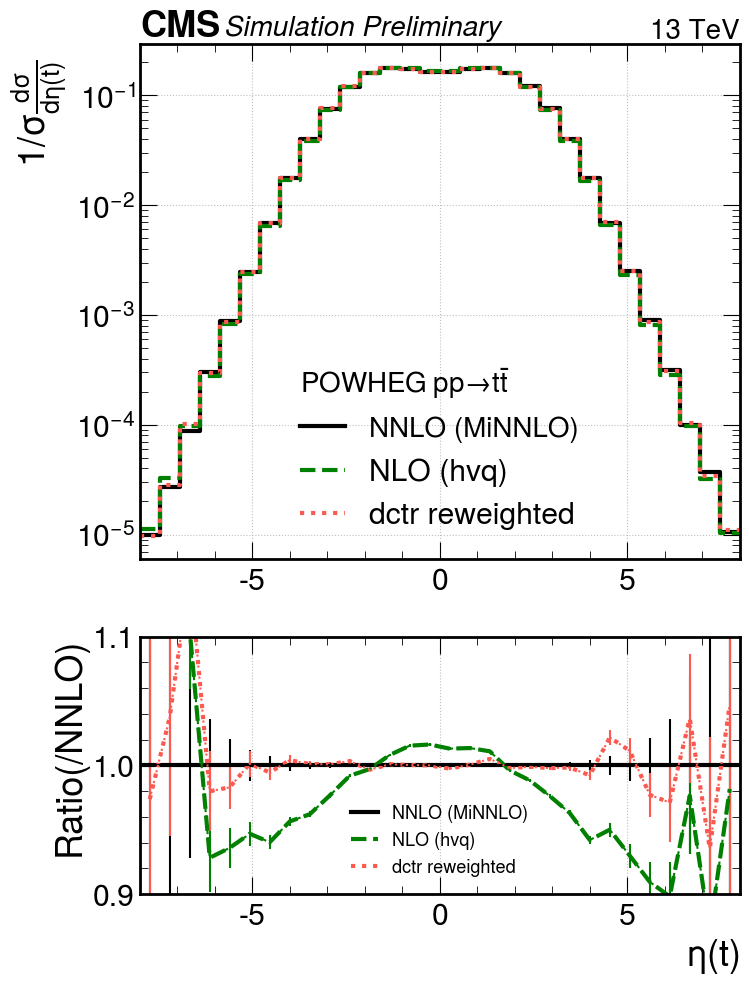

In [12]:
# eta(t) +/- 8
lin_bins = np.linspace(-8, 8, 31)
DCTR.plot_ratio_cms(args, arg_index=4, part_index=1, bins=lin_bins, y_scale='log', ratio_ylim=[0.90, 1.10], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'mean_lin_pm8_31')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


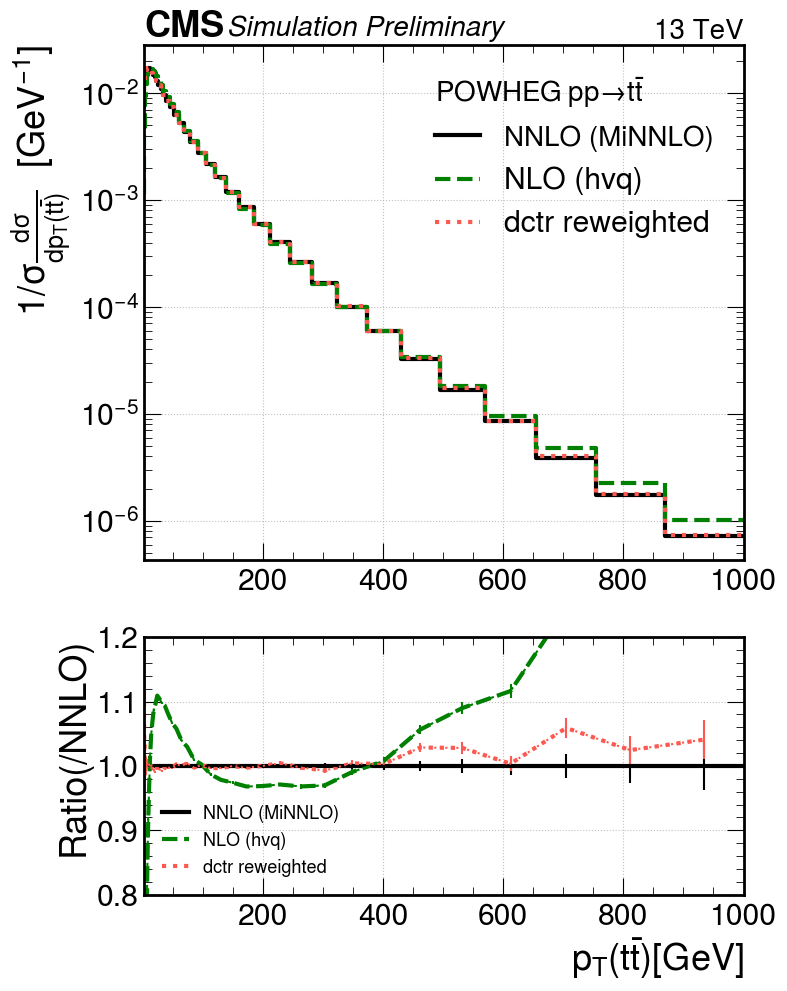

In [13]:
# p_t(tt) log binning
log_bins = np.logspace(np.log10(1), np.log10(1000), 50)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.80, 1.20], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'mean_log_1000_50')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


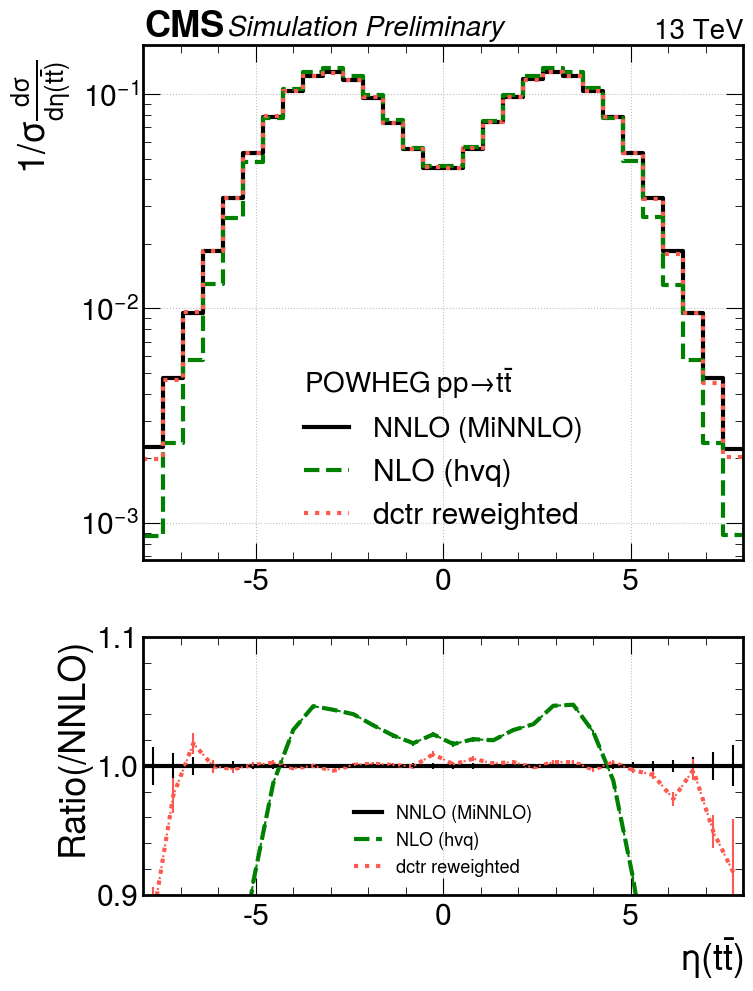

In [14]:
# eta(tt) +/- 8
lin_bins = np.linspace(-8, 8, 31)
DCTR.plot_ratio_cms(args, arg_index=4, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.90, 1.10], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'mean_lin_pm8_31')


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


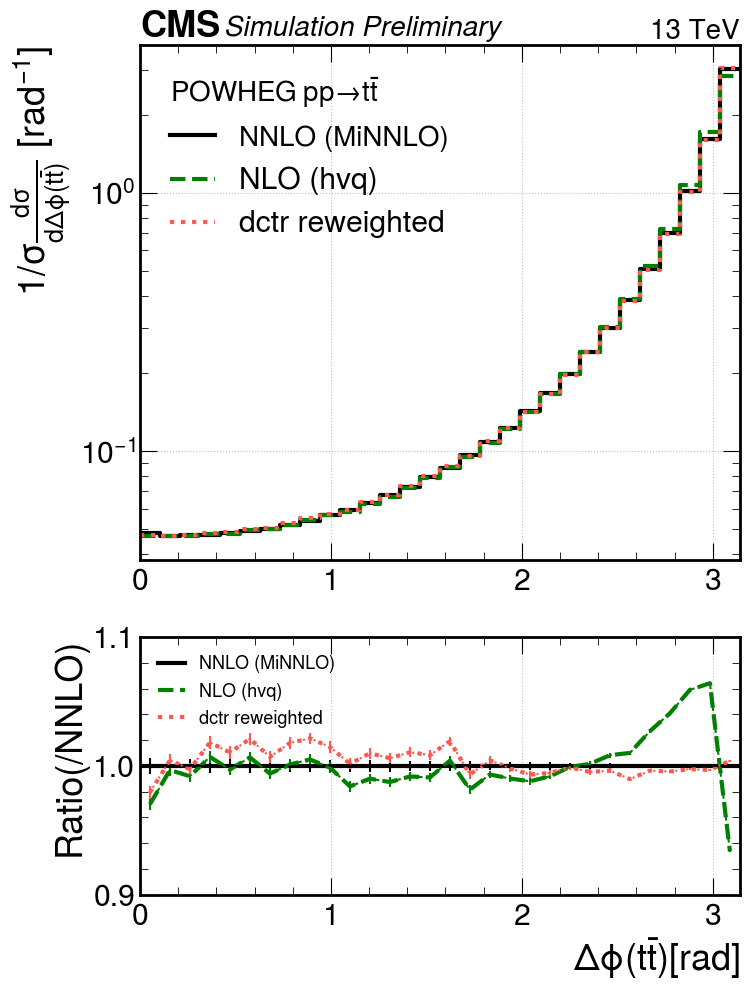

In [15]:
# delta phi
X0_delta_phi = DCTR.delta_phi(X0_plt)
X1_delta_phi = DCTR.delta_phi(X1_plt)

args_delta_phi = [(X1_delta_phi, X1_plt_wgt, 'NNLO (MiNNLO)'), 
                  (X0_delta_phi, X0_plt_wgt, 'NLO (hvq)'),
                  (X0_delta_phi, rwgt, 'dctr reweighted')]

DCTR.plot_ratio_cms(args_delta_phi, start = 0, stop = math.pi, div=31, part_label=r't \bar{t}', arg_label=r'\Delta \phi', unit='[rad]', inv_unit='[rad$^{-1}$]', y_scale='log', save_prefix='mean_lin_pi_31')


In [16]:
# find min values for E and m
min_E_tt = min(X1_plt[:, 0,5]) # min E tt (NNLO)
print(min_E_tt)

min_E_t = min(X1_plt[:, 1,5]) # min E t  (NNLO)
print(min_E_t)

min_m_tt = min(X1_plt[:, 0,3]) # min m tt (NNLO)
print(min_m_tt)


329.6132055
159.6472363
322.9727283915917


'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-italic.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


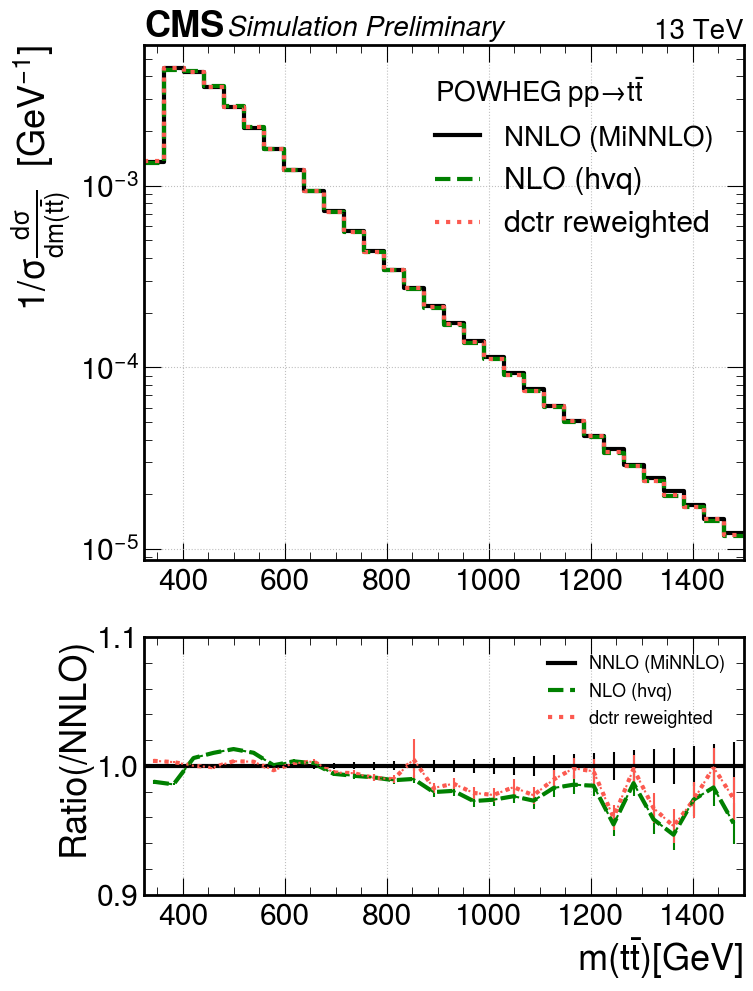

In [17]:
# m(tt) min(X1[:,])
lin_bins = np.linspace(min_m_tt, 1500, 31)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.90, 1.10], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'mean_lin_min-1500_31')


# More Plots


In [ ]:
# p_T | arg_index=0
# top | part_index = 1
lin_bins = np.linspace(0,600,19)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=lin_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_0600_19')
lin_bins = np.linspace(0,800,19)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=lin_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_0800_19')
lin_bins = np.linspace(0,1000,19)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=lin_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_1000_19')

log_bins = np.logspace(np.log10(1),np.log10(600),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_0600_31')
log_bins = np.logspace(np.log10(1),np.log10(800),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_0800_31')
log_bins = np.logspace(np.log10(1),np.log10(1000),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=1, bins=log_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_1000_31')


# anti-top | part_index = 2
lin_bins = np.linspace(0,600,19)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=2, bins=lin_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_0600_19')
lin_bins = np.linspace(0,800,19)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=2, bins=lin_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_0800_19')
lin_bins = np.linspace(0,1000,19)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=2, bins=lin_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_1000_19')

log_bins = np.logspace(np.log10(1),np.log10(600),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=2, bins=log_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_0600_31')
log_bins = np.logspace(np.log10(1),np.log10(800),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=2, bins=log_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_0800_31')
log_bins = np.logspace(np.log10(1),np.log10(1000),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=2, bins=log_bins, y_scale='log', ratio_ylim=[0.9, 1.1], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_1000_31')


# tt-pair | part_index = 0
lin_bins = np.linspace(0,800,31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_0800_31')
lin_bins = np.linspace(0,1000,31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_1000_31')
lin_bins = np.linspace(0,1500,31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_1500_31')

lin_bins = np.linspace(0,800,19)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_0800_19')
lin_bins = np.linspace(0,1000,31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_1000_19')
lin_bins = np.linspace(0,1500,31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=lin_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix = 'lin_1500_19')

log_bins = np.logspace(np.log10(1),np.log10(800),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_0800_31')
log_bins = np.logspace(np.log10(1),np.log10(1000),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_1000_31')
log_bins = np.logspace(np.log10(1),np.log10(1500),31)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_1500_31')




In [ ]:
# more log binned tt-pair plots
log_bins = np.logspace(np.log10(1),np.log10(800),50)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_0800_50')
log_bins = np.logspace(np.log10(1),np.log10(1000),50)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_1000_50')
log_bins = np.logspace(np.log10(1),np.log10(1500),50)
DCTR.plot_ratio_cms(args, arg_index=0, part_index=0, bins=log_bins, y_scale='log', ratio_ylim=[0.8, 1.2], pythia_text=r'$POWHEG \; pp \to  t\bar{t}$', save_prefix='log_1500_50')


In [ ]:
# delta phi
X0_delta_phi = DCTR.delta_phi(X0_plt)
X1_delta_phi = DCTR.delta_phi(X1_plt)

args_delta_phi = [(X1_delta_phi, X1_plt_wgt, 'NNLO (MiNNLO)'), 
                  (X0_delta_phi, X0_plt_wgt, 'NLO (hvq)'),
                  (X0_delta_phi, rwgt, 'dctr reweighted')]


DCTR.plot_ratio_cms(args_delta_phi, start = 0, stop = math.pi, div=31, part_label=r't \bar{t}', arg_label=r'\Delta \phi', unit='[rad]', inv_unit='[rad$^{-1}$]', y_scale='log', save_prefix='lin_pi_31')

DCTR.plot_ratio_cms(args_delta_phi, start = 0, stop = math.pi, div=25, part_label=r't \bar{t}', arg_label=r'\Delta \phi', unit='[rad]', inv_unit='[rad$^{-1}$]', y_scale='log', save_prefix='lin_pi_25')

DCTR.plot_ratio_cms(args_delta_phi, start = 0, stop = math.pi, div=19, part_label=r't \bar{t}', arg_label=r'\Delta \phi', unit='[rad]', inv_unit='[rad$^{-1}$]', y_scale='log', save_prefix='lin_pi_19')

In [ ]:
# Energy | arg_index = 5 
# top | part_index = 1
lin_bins = np.linspace(159.6, 2000, 31)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=1, bins=lin_bins, y_scale='log', save_prefix='lin_2000_31')
lin_bins = np.linspace(159.6, 2000, 19)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=1, bins=lin_bins, y_scale='log', save_prefix='lin_2000_19')

log_bins = np.logspace(np.log10(159.6), np.log10(2000), 51)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=1, bins=log_bins, y_scale='log', save_prefix='log_2000_51')
log_bins = np.logspace(np.log10(159.6), np.log10(2000), 31)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=1, bins=log_bins, y_scale='log', save_prefix='log_2000_31')


# anti-top | part_index = 2
lin_bins = np.linspace(159.6, 2000, 31)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=2, bins=lin_bins, y_scale='log', save_prefix='lin_2000_31')
lin_bins = np.linspace(159.6, 2000, 19)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=2, bins=lin_bins, y_scale='log', save_prefix='lin_2000_19')

log_bins = np.logspace(np.log10(159.6), np.log10(2000), 51)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=2, bins=log_bins, y_scale='log', save_prefix='log_2000_51')
log_bins = np.logspace(np.log10(159.6), np.log10(2000), 31)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=2, bins=log_bins, y_scale='log', save_prefix='log_2000_31')


# tt-pair | part_index = 0
lin_bins = np.linspace(329.6, 3000, 31)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=0, bins=lin_bins, y_scale='log', save_prefix='lin_3000_31')
lin_bins = np.linspace(329.6, 3000, 19)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=0, bins=lin_bins, y_scale='log', save_prefix='lin_3000_19')

log_bins = np.logspace(np.log10(329.6), np.log10(3000), 51)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=0, bins=log_bins, y_scale='log', save_prefix='log_3000_51')
log_bins = np.logspace(np.log10(329.6), np.log10(3000), 31)
DCTR.plot_ratio_cms(args, arg_index=5, part_index=0, bins=log_bins, y_scale='log', save_prefix='log_3000_31')


In [ ]:
# mass | arg_index = 3
# top | part_index = 1
DCTR.plot_ratio_cms(args, arg_index=3, part_index=1, div=32, y_scale='log', save_prefix='lin_32')
DCTR.plot_ratio_cms(args, arg_index=3, part_index=1, div=20, y_scale='log', save_prefix='lin_20')

# anti-top | part_index = 2
DCTR.plot_ratio_cms(args, arg_index=3, part_index=2, div=32, y_scale='log', save_prefix='lin_32')
DCTR.plot_ratio_cms(args, arg_index=3, part_index=2, div=20, y_scale='log', save_prefix='lin_20')


# tt-pair | part_index = 0
lin_bins = np.linspace(323, 1500, 51)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=lin_bins, y_scale='log', save_prefix='lin_1500_51')
lin_bins = np.linspace(323, 1500, 31)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=lin_bins, y_scale='log', save_prefix='lin_1500_31')
lin_bins = np.linspace(323, 1500, 19)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=lin_bins, y_scale='log', save_prefix='lin_1500_19')

log_bins = np.logspace(np.log10(323), np.log10(1500), 51)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=log_bins, y_scale='log', save_prefix='log_1500_51')
log_bins = np.logspace(np.log10(323), np.log10(1500), 31)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=log_bins, y_scale='log', save_prefix='log_1500_31')
log_bins = np.logspace(np.log10(323), np.log10(1500), 19)
DCTR.plot_ratio_cms(args, arg_index=3, part_index=0, bins=log_bins, y_scale='log', save_prefix='log_1500_19')


In [ ]:
# eta | arg_index = 4 
# tt-pair | part_index = 0
DCTR.plot_ratio_cms(args, arg_index=4, part_index=0, start=-8, stop=8, div=19, y_scale='log', save_prefix='lin_pm8_19')
DCTR.plot_ratio_cms(args, arg_index=4, part_index=0, start=-8, stop=8, div=31, y_scale='log', save_prefix='lin_pm8_31')


# y | arg_index = 1
# top | part_index = 1
DCTR.plot_ratio_cms(args, arg_index=1, part_index=1, start=-4, stop=4, div=19, y_scale='log', save_prefix='lin_pm5_19')
DCTR.plot_ratio_cms(args, arg_index=1, part_index=1, start=-4, stop=4, div=31, y_scale='log', save_prefix='lin_pm4_31')

# anti-top | part_index = 2
DCTR.plot_ratio_cms(args, arg_index=1, part_index=2, start=-4, stop=4, div=19, y_scale='log', save_prefix='lin_pm4_19')
DCTR.plot_ratio_cms(args, arg_index=1, part_index=2, start=-4, stop=4, div=31, y_scale='log', save_prefix='lin_pm4_31')
